In [51]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline 


In [52]:
df = pd.read_excel('autoMPG_data.xlsx')

In [71]:
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0


In [54]:
df = df.drop('Name', axis=1)

In [70]:
#replacing empty values with medians of the columns

df['GallonsPer100Miles'].fillna(df['GallonsPer100Miles'].median(), inplace=True)
df['GallonsPer100MilesTo1981'].fillna(df['GallonsPer100MilesTo1981'].median(), inplace=True)
df['MPG'].fillna(df['MPG'].median(), inplace=True)
df['Cylinders'].fillna(df['Cylinders'].median(), inplace=True)
df['Displacement100ci'].fillna(df['Displacement100ci'].median(), inplace=True)
df['Horsepower100'].fillna(df['Horsepower100'].median(), inplace=True)
df['Weight1000lb'].fillna(df['Weight1000lb'].median(), inplace=True)
df['Seconds0to60'].fillna(df['Seconds0to60'].median(), inplace=True)
df['Year'].fillna(df['Year'].median(), inplace=True)
df['Year70To81'].fillna(df['Year70To81'].median(), inplace=True)
df['Origin'].fillna(df['Origin'].median(), inplace=True)
df['Origin.Eq.1'].fillna(df['Origin.Eq.1'].median(), inplace=True)
df['Origin.Eq.2'].fillna(df['Origin.Eq.2'].median(), inplace=True)
df['Origin.Eq.3'].fillna(df['Origin.Eq.3'].median(), inplace=True)

-----------------

In [59]:
# sns.pairplot(df, kind = 'reg')

In [60]:
# checking the correlation of the variables 
df.corr()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
GallonsPer100Miles,1.000000,0.969012,-0.935935,0.839385,0.866050,0.854809,0.885056,-0.456338,-0.558255,0.272419,-0.532932,0.546366,-0.264829,-0.409405
GallonsPer100MilesTo1981,0.969012,1.000000,-0.883338,0.820716,0.854735,0.843147,0.871405,-0.449583,-0.468866,0.043607,-0.533528,0.556667,-0.289903,-0.398169
MPG,-0.935935,-0.883338,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,-0.315908,0.565209,-0.565161,0.244313,0.451454
Cylinders,0.839385,0.820716,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,0.214933,-0.568932,0.610494,-0.352324,-0.404209
Displacement100ci,0.866050,0.854735,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,0.182566,-0.614535,0.655936,-0.371633,-0.440825
Horsepower100,0.854809,0.843147,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.172258,-0.455171,0.489625,-0.284948,-0.321936
Weight1000lb,0.885056,0.871405,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,0.184409,-0.585005,0.600978,-0.293841,-0.447929
Seconds0to60,-0.456338,-0.449583,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,-0.101206,0.212746,-0.258224,0.208298,0.115020
Year,-0.558255,-0.468866,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.471084,0.181528,-0.136065,-0.037745,0.199841
Year70To81,0.272419,0.043607,-0.315908,0.214933,0.182566,0.172258,0.184409,-0.101206,-0.471084,1.000000,-0.032254,-0.004955,0.081198,-0.070666


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


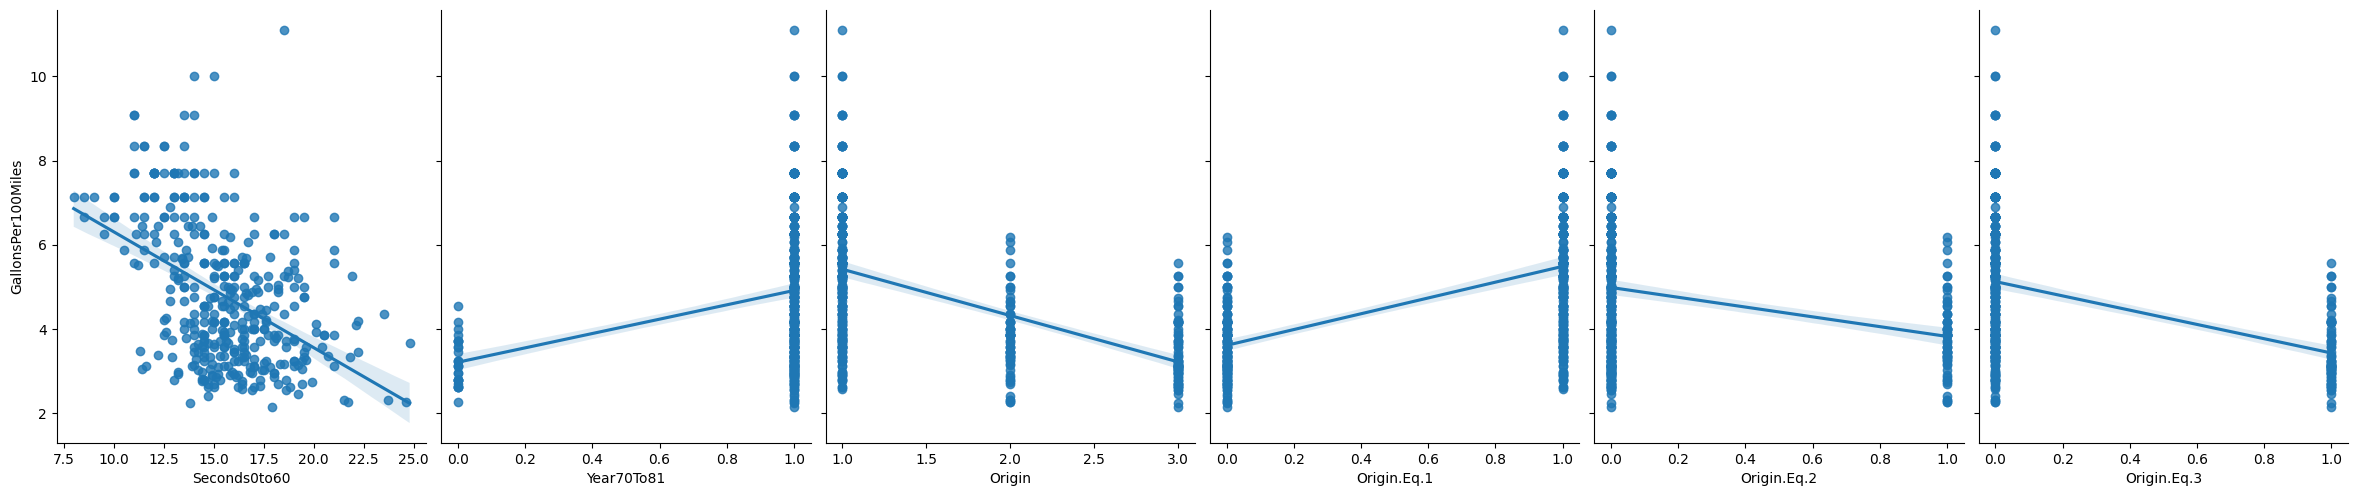

In [61]:
# we cant use these values, since their values are close to 0
sns.pairplot(df, x_vars=['Seconds0to60', 'Year70To81', 'Origin', 'Origin.Eq.1', 'Origin.Eq.2', 'Origin.Eq.3'], y_vars='GallonsPer100Miles', height=5, aspect=0.8, kind='reg')

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


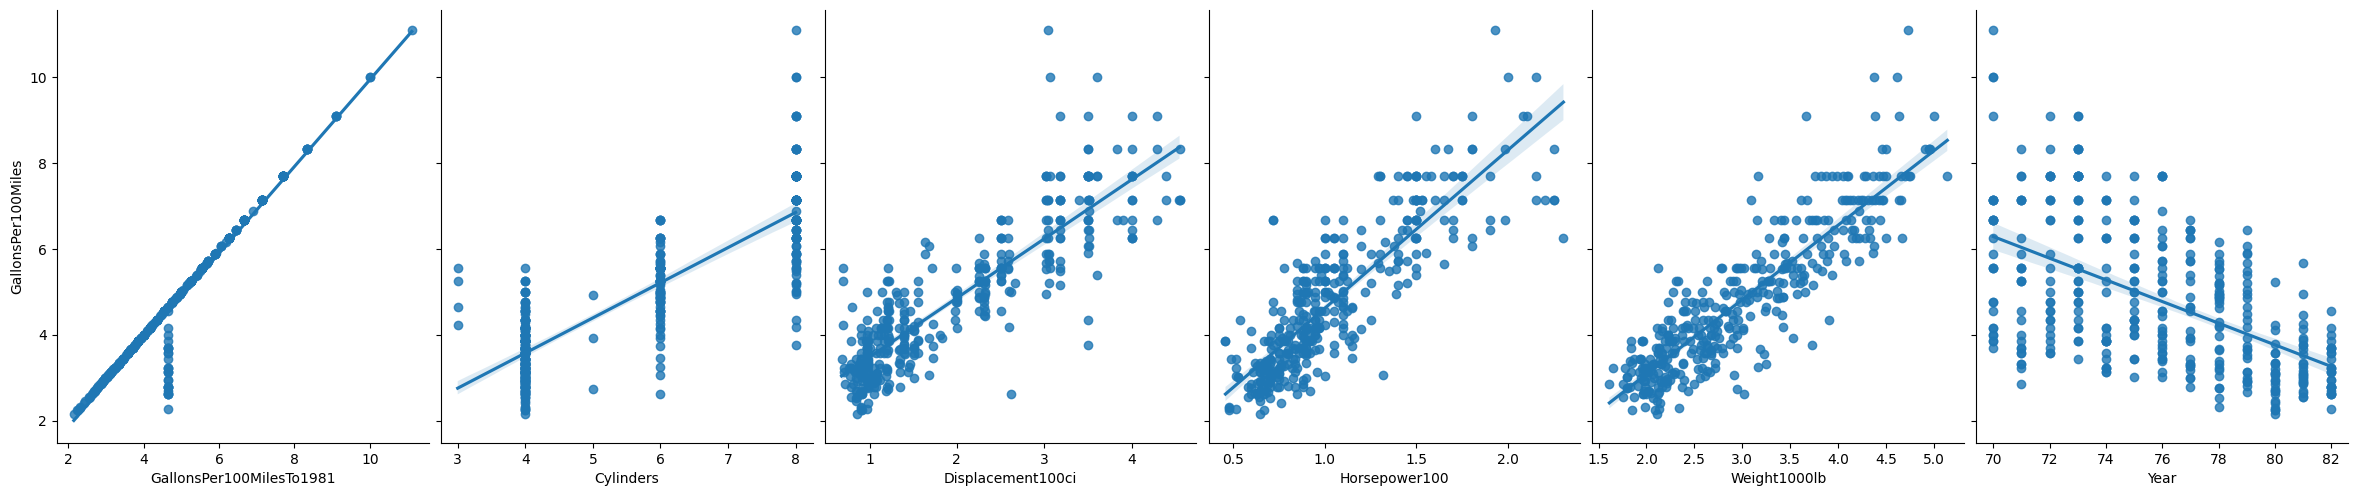

In [62]:
sns.pairplot(df, x_vars=['GallonsPer100MilesTo1981', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Year'], y_vars='GallonsPer100Miles', height=5, aspect=0.8, kind='reg')

In [63]:
# Creating the model
model = LinearRegression()

# Fitting the model
# This is where the training is happening. passing the values
model.fit(df[['GallonsPer100MilesTo1981', 'MPG', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Year']], df['GallonsPer100Miles'])  

# Coefficients and Intercept
coefficients = model.coef_ 
intercept = model.intercept_


In [64]:
# Making predictions
predictions = model.predict(df[['GallonsPer100MilesTo1981', 'MPG', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Year']])

# Model Evaluation
r_squared = model.score(df[['GallonsPer100MilesTo1981', 'MPG', 'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Year']], df['GallonsPer100Miles'])
print("R-squared:", r_squared) 
# R-squared is commonly used as a measure to quantify how well a linear model captures the variability in the data.

R-squared: 0.9760480422491047


# our model is successful

In [65]:
print(predictions)

[ 5.94305695  6.81454484  5.95494963  6.48945724  6.20485667  6.92791449
  7.27528328  7.27507053  7.30262969  6.84867662  6.74316449  7.13032153
  6.72025108  6.97271065  4.4154061   4.89359543  5.6873954   4.98730265
  3.93320758  3.90162583  4.32473049  4.42753208  4.27900161  4.11566256
  5.01526026  9.36116611  9.34959873  8.77060087 10.13078985  3.89029296
  3.73093612  4.18602931  5.34136942  6.3003001   5.95453012  5.45094695
  5.72722091  7.23125671  7.23998892  7.18883127  7.21844595  8.20309273
  7.67352961  7.78199823  5.62970076  4.61607109  5.47335541  5.63549608
  4.46017995  3.73309628  3.48623701  3.48384959  3.29668151  2.83565707
  3.75357618  3.95217626  4.30641602  4.10764451  4.39118486  4.98720381
  4.76805663  7.57980583  7.17760933  6.85265249  7.13975685  6.19367803
  8.57139078  7.61320297  8.04240744  7.59634447  5.21578684  6.81430505
  7.52282503  7.60158594  7.17084989  5.62816563  4.63686062  4.95894303
  3.95695157  4.62952184  3.76460608  4.51586689  3

In [66]:
test_data = {
    'GallonsPer100MilesTo1981':  [3.5, 4, 6.5, 5],
    'MPG': [17, 18, 19, 20],
    'Cylinders': [4, 6, 8, 3],
    'Displacement100ci': [3, 4, 4.5, 3.5],
    'Horsepower100': [1, 2, 1.5, 2.5],
    'Weight1000lb': [3, 4, 3.5, 4.5],
    'Year': [73, 74, 75, 76],
}
test_df = pd.DataFrame(test_data)

# Making prediction using the trained model
predicted_consumption = model.predict(test_df)

consumption = df['GallonsPer100Miles']
for i, consumption in enumerate(predicted_consumption):
    print(f"Predicted Consumption for Cars {i+1}: {consumption}")

Predicted Consumption for Cars 1: 4.147058226311605
Predicted Consumption for Cars 2: 4.831214461568306
Predicted Consumption for Cars 3: 6.0537674886486625
Predicted Consumption for Cars 4: 5.289255532575217


### Extra testings: feed some new values into your model such that the values are 
###    - within the interpolation range. 
###    - from the extrapolation range

In [67]:
print(df['Weight1000lb'].min())
print(df['Weight1000lb'].max())
print('----')
print(df['MPG'].min())
print(df['MPG'].max())
print('----')
print(df['Horsepower100'].min())
print(df['Horsepower100'].max())

1.613
5.14
----
9.0
46.6
----
0.46
2.3


interpolation range: 

In [68]:
test_data = {
    'GallonsPer100MilesTo1981':  [3.5],
    'MPG': [10], #
    'Cylinders': [4],
    'Displacement100ci': [3],
    'Horsepower100': [2], #
    'Weight1000lb': [5], #
    'Year': [73],
}
test_df = pd.DataFrame(test_data)
predicted_consumption = model.predict(test_df)

consumption = df['GallonsPer100Miles']
for i, consumption in enumerate(predicted_consumption):
    print(f"Predicted Consumption for Cars {i+1}: {consumption}")

Predicted Consumption for Cars 1: 5.240377398006926


it is still within reasonable prediction range

----------------------------------------------

extrapolation range:

In [69]:
test_data = {
    'GallonsPer100MilesTo1981':  [3.5],
    'MPG': [5], #
    'Cylinders': [4],
    'Displacement100ci': [3],
    'Horsepower100': [4], #
    'Weight1000lb': [10], #
    'Year': [73],
}
test_df = pd.DataFrame(test_data)
predicted_consumption = model.predict(test_df)

consumption = df['GallonsPer100Miles']
for i, consumption in enumerate(predicted_consumption):
    print(f"Predicted Consumption for Cars {i+1}: {consumption}")

Predicted Consumption for Cars 1: 7.194180517805451


it is also still in reasonable prediction range